# **Aotizhongxin-Air-Quality**

Data from: https://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data

In [98]:
import pandas as pd
import numpy as np
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import Callback, EarlyStopping

In [99]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv')

In [100]:
print(len(df))

35064


In [101]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [102]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.drop(df.iloc[:, 0:8], inplace=True, axis=1)
df

,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...
35059,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin,2017-02-28 19:00:00
35060,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin,2017-02-28 20:00:00
35061,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin,2017-02-28 21:00:00
35062,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin,2017-02-28 22:00:00


In [103]:
df.drop(df.iloc[:, 1:10], inplace=True, axis=1)
df

,NO2,date
0,7.0,2013-03-01 00:00:00
1,7.0,2013-03-01 01:00:00
2,10.0,2013-03-01 02:00:00
3,11.0,2013-03-01 03:00:00
4,12.0,2013-03-01 04:00:00
...,...,...
35059,35.0,2017-02-28 19:00:00
35060,45.0,2017-02-28 20:00:00
35061,66.0,2017-02-28 21:00:00
35062,87.0,2017-02-28 22:00:00


In [104]:
df.isna().sum()

NO2     1023
date       0
dtype: int64

In [105]:
mean_no2 = df['NO2'].mean()
df['NO2'].fillna(mean_no2, inplace=True)

In [106]:
df = df.dropna(how='any',axis=0)
df.isna().sum()

NO2     0
date    0
dtype: int64

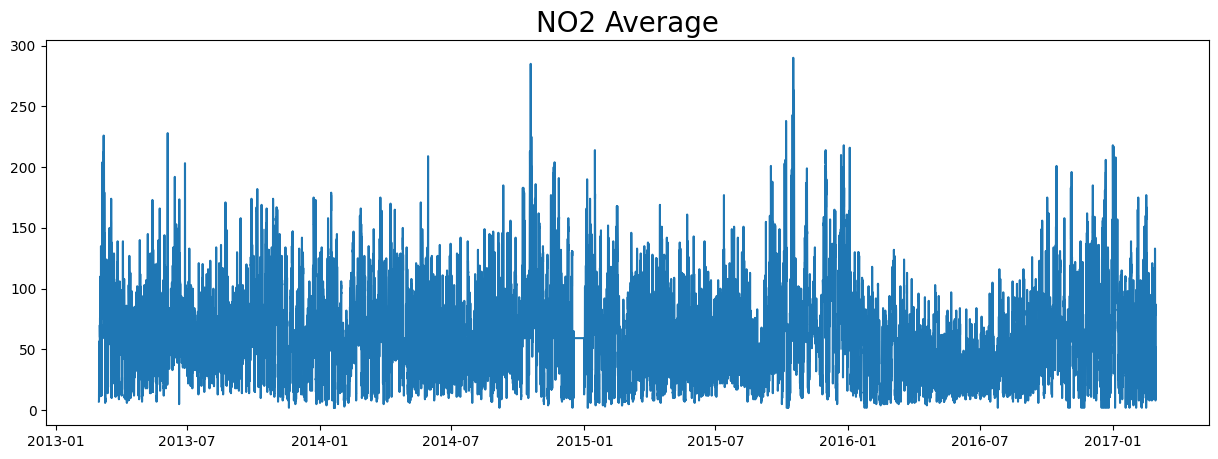

In [107]:
date = df['date'].values
no2 = df['NO2'].values

plt.figure(figsize=(15,5))
plt.plot(date, no2)
plt.title('NO2 Average', fontsize=20);

In [108]:
temp_train, temp_test = train_test_split(no2, test_size=0.2, shuffle=False)
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(np.array(temp_train).reshape(-1, 1))
train = min_max_scaler.transform(np.array(temp_train).reshape(-1, 1))
test = min_max_scaler.transform(np.array(temp_test).reshape(-1, 1))

In [109]:
print(train)

[[0.01736111]
 [0.01736111]
 [0.02777778]
 ...
 [0.02083333]
 [0.02777778]
 [0.03819444]]


In [110]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [111]:
threshold_mae = (np.max(train) - np.min(train)) * 10/100
print(threshold_mae)

0.1


In [112]:
window_size = 60
train_set = windowed_dataset(train, window_size=window_size, batch_size=128, shuffle_buffer=1000)
test_set = windowed_dataset(test, window_size=window_size, batch_size=128, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                          kernel_size=5,
                          strides=1,
                          padding='causal',
                          activation='relu',
                          input_shape=[window_size, 1]),
    tf.keras.layers.LSTM(64, input_shape=(window_size, 1), return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [113]:
class MyCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<threshold_mae):
      self.model.stop_training = True
callback = MyCallback()
early_stopping = EarlyStopping(monitor='val_mae', patience=15)

In [114]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae'])
history_train = model.fit(train_set,
                          validation_data=(test_set),
                          epochs= 100,
                          verbose=2,
                          callbacks = [callback, early_stopping])

Epoch 1/100
219/219 - 13s - loss: 0.0222 - mae: 0.1698 - val_loss: 0.0133 - val_mae: 0.1156 - 13s/epoch - 58ms/step
Epoch 2/100
219/219 - 8s - loss: 0.0121 - mae: 0.1181 - val_loss: 0.0092 - val_mae: 0.1018 - 8s/epoch - 37ms/step
Epoch 3/100
219/219 - 6s - loss: 0.0091 - mae: 0.1026 - val_loss: 0.0085 - val_mae: 0.1031 - 6s/epoch - 27ms/step
Epoch 4/100
219/219 - 7s - loss: 0.0083 - mae: 0.0991 - val_loss: 0.0085 - val_mae: 0.1053 - 7s/epoch - 32ms/step


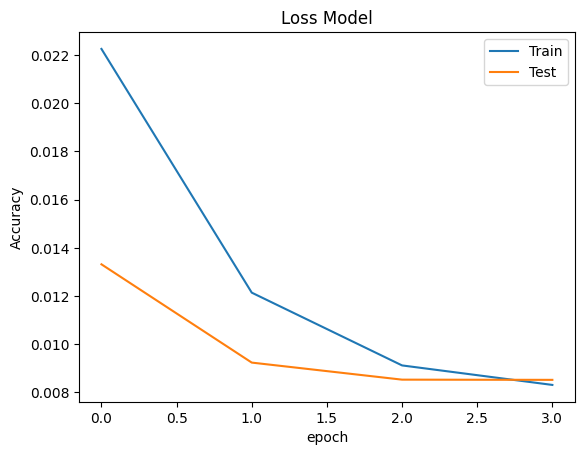

In [115]:
plt.plot(history_train.history['loss'])
plt.plot(history_train.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()

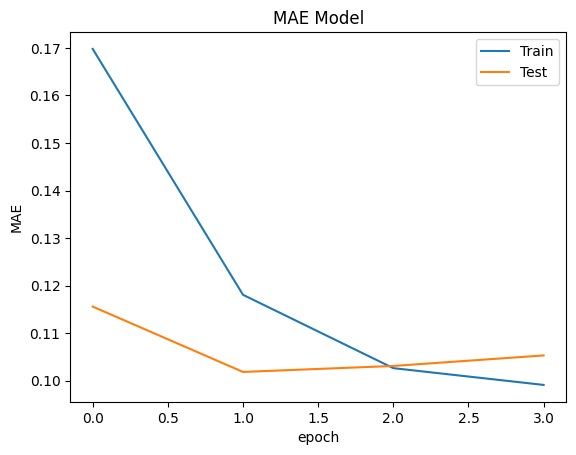

In [116]:
plt.plot(history_train.history['mae'])
plt.plot(history_train.history['val_mae'])
plt.title('MAE Model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()